In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os

In [14]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [2]:
DataO=pd.read_csv("datos/ObesityDataSet_raw_and_data_sinthetic.csv", sep=",")


In [3]:
DataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
## Redodndeamos la variable 'FCVC' a 0 decimales
DataO['FCVC']=DataO['FCVC'].apply(lambda x: np.round(x,0)).astype(int)
DataO['FCVC'].value_counts()

FCVC
2    1013
3     996
1     102
Name: count, dtype: int64

In [5]:
## Redodndeamos la variable 'FCVC' a 0 decimales
DataO['TUE']=DataO['TUE'].apply(lambda x: np.round(x,0)).astype(int)
DataO['TUE'].value_counts()

TUE
0    952
1    915
2    244
Name: count, dtype: int64

In [6]:
DataO.drop(['Height','Weight'],axis=1,inplace=True)

In [7]:
DataO.select_dtypes(include='object')



,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
DataO['CAEC']=DataO['CAEC'].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})
DataO['CALC']=DataO['CALC'].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})

In [9]:
DataO

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,yes,no,2,3.0,1,no,2.000000,no,0.000000,1,0,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,3,3.0,1,yes,3.000000,yes,3.000000,0,1,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,2,3.0,1,no,2.000000,no,2.000000,1,2,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,3,3.0,1,no,2.000000,no,2.000000,0,2,Walking,Overweight_Level_I
4,Male,22.000000,no,no,2,1.0,1,no,2.000000,no,0.000000,0,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3,3.0,1,no,1.728139,no,1.676269,1,1,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,3,3.0,1,no,2.005130,no,1.341390,1,1,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,3,3.0,1,no,2.054193,no,1.414209,1,1,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,3,3.0,1,no,2.852339,no,1.139107,1,1,Public_Transportation,Obesity_Type_III


<Axes: xlabel='CALC', ylabel='count'>

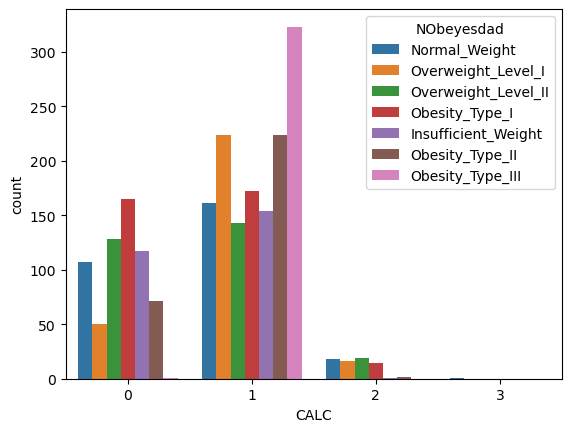

In [10]:
# veamos la relacion de CALC con NObeyesdad
sb.countplot(data=DataO,x='CALC',hue='NObeyesdad')

In [11]:
# categoricas a dummmies
columnas_entrada= DataO.drop('NObeyesdad',axis=1).columns
columnas_salida='NObeyesdad'

X=DataO[columnas_entrada]
y=DataO[columnas_salida]

X=pd.get_dummies(X)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   FCVC                                2111 non-null   int32  
 2   NCP                                 2111 non-null   float64
 3   CAEC                                2111 non-null   int64  
 4   CH2O                                2111 non-null   float64
 5   FAF                                 2111 non-null   float64
 6   TUE                                 2111 non-null   int32  
 7   CALC                                2111 non-null   int64  
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

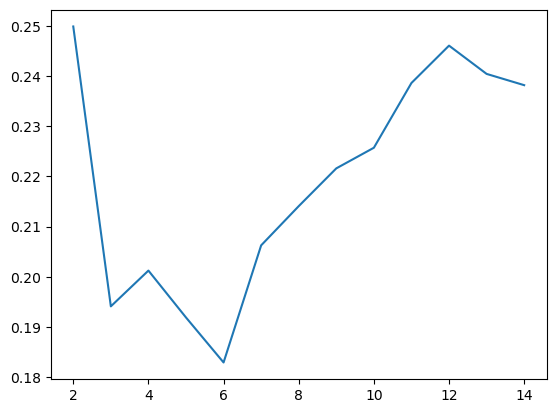

In [15]:
#### Primero hagamos unos cluster

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
## silueta score
from sklearn.metrics import silhouette_score

sc=StandardScaler()

X=sc.fit_transform(X)

list_score=[]

for n_clusters in range(2,15):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    clusters=kmeans.predict(X)
    silhouette_avg=silhouette_score(X,clusters)
    list_score.append((n_clusters,silhouette_avg))

plt.plot([x[0] for x in list_score],[x[1] for x in list_score])